In [1]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_parquet("data/cnb_vyber.parquet")

In [4]:
df['rok'] = df["008"].apply(lambda x: najdi_rok(x))

In [5]:
df = df[df['rok'].notnull()]

In [6]:
df = df.drop_duplicates(subset=['100_a','245_a'])

In [7]:
df.columns

Index(['008', '020_a', '020_c', '020_q', '041_a', '041_h', '041_ind1', '044_a',
       '072_a', '072_x', '080_a', '100_4', '100_7', '100_a', '100_d', '240_l',
       '245_a', '245_c', '245_n', '245_p', '246_a', '250_a', '250_b', '260_a',
       '260_b', '260_c', '260_e', '260_f', '260_ind1', '264_a', '264_b',
       '264_c', '264_ind2', '300_a', '300_b', '300_c', '490_a', '490_v',
       '500_a', '520_a', '520_b', '521_a', '546_a', '648_a', '650_a', '650_x',
       '650_y', '650_z', '651_a', '653_a', '655_a', '700_4', '700_7', '700_a',
       '700_d', '710_4', '710_7', '710_a', '710_b', '830_a', '928_a', '964_a',
       'leader', 'rok'],
      dtype='object')

In [8]:
sloupce = ['072_x','648_a','650_a','650_x','650_y','655_a','653_a']

In [9]:
df['700_a'].sample(10)

001
bk192901436                        None
cpk20051631433                     None
cpk20011033680                     None
nkc20081832292                     None
nkc20152678965         [Machačka, Ivo,]
cpk20011023283                     None
bk197600010               [Kuneš, Petr]
nkc20091860731          [Herová, Irena]
nkc20162786077    [Hanišová, Viktorie,]
cpk19960138936                     None
Name: 700_a, dtype: object

In [10]:
import matplotlib.pyplot as plt

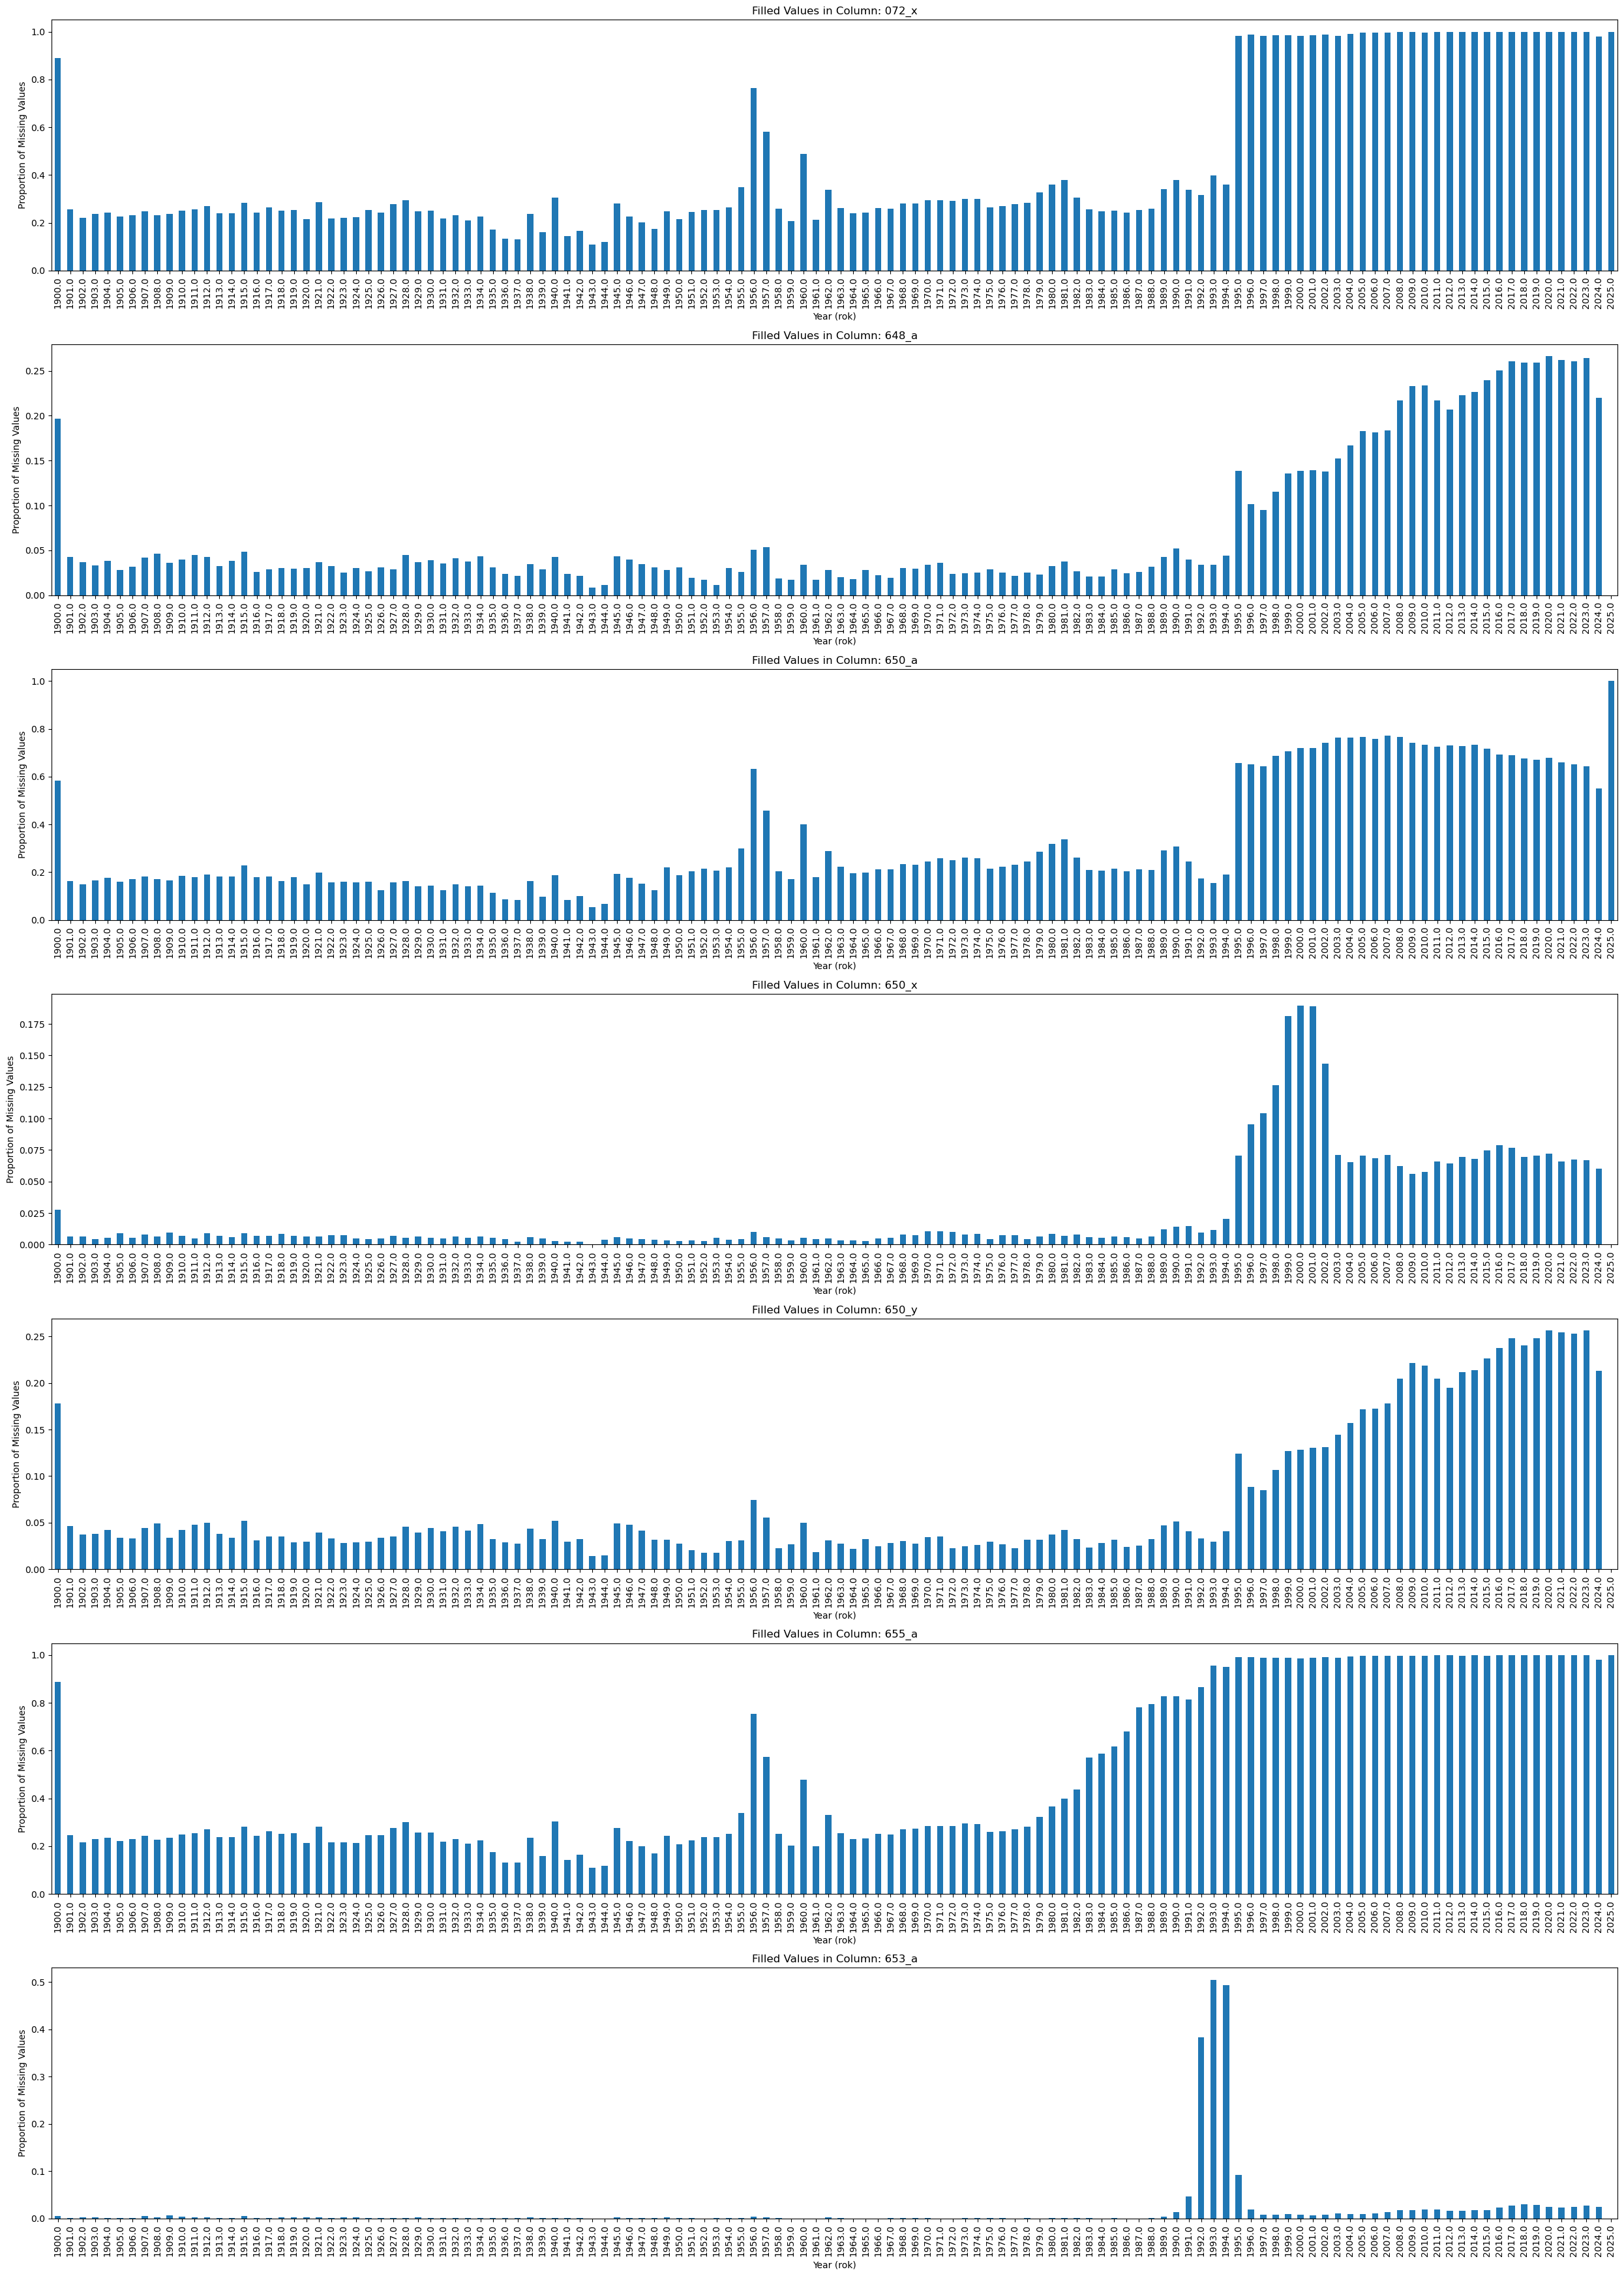

In [11]:
fig, axes = plt.subplots(nrows=len(sloupce), figsize=(25, len(sloupce) * 5))  # Adjust figsize as needed

# Iterate through columns and create bar charts on separate subplots
for i, col in enumerate(sloupce):
    (df[df[col].notnull()].groupby('rok').size() / df.groupby('rok').size()).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"Filled Values in Column: {col}")  # Add informative titles
    axes[i].set_xlabel('Year (rok)')
    axes[i].set_ylabel('Proportion of Missing Values')

# Adjust layout and spacing (optional)
plt.tight_layout()

# Display all subplots
plt.show()

In [12]:
def temata(radek):
    tematka = []
    for s in sloupce:
        try:
            for t in radek[s]:        
                tematka.append(str(t).lower())
        except:
            pass
    return set(tematka)

In [13]:
df['temata'] = df.apply(lambda row: temata(row), axis=1)

In [14]:
df[['655_a','653_a','650_a','072_x','temata']].sample(20)

,655_a,653_a,650_a,072_x,temata
001,,,,,
bk194302800,None,None,None,None,{}
ck8600671,None,None,None,None,{}
nkc20213328496,"[české příběhy, vědecko-fantastické příběhy, C...",None,None,[Česká próza],"{české příběhy, science fiction stories, vědec..."
cpk20010985760,"[úvahy, citáty, essays, quotations]",None,"[katoličtí kněží, křesťanská spiritualita, duc...",[Liturgie. Křesťanské umění a symbolika. Ducho...,"{biblické citáty, úvahy, spiritual literature,..."
np9537700,"[učebnice středních škol, učebnice základních ...","[dějiny, Československo]",None,None,"{dějiny, učebnice středních škol, českoslovens..."
bk19821374d,[příručky],None,"[automatizované systémy řízení, sociální proce...",[Automatizační a řídicí technika],"{automatizované systémy řízení, automatizační ..."
nos190118862,None,None,None,None,{}
nkc20152749989,"[česká poezie, říkadla, leporela, publikace pr...",None,None,"[Česká poezie, Literatura pro děti a mládež (b...","{říkadla, children's literature, literatura pr..."
nkc20162840992,"[sborníky, miscellanea]",None,"[palindromy, hádanky, jazykové hry, palindrome...",[Společenská zábava],"{miscellanea, hádanky, sborníky, společenská z..."


In [15]:
df = df.explode("temata")

In [16]:
df['temata'].nunique()

91559

In [150]:
df['meta'] = df['temata'].apply(lambda x: x.split('(')[1].split(')')[0].strip() if '(' in str(x) else None)

In [152]:
df.groupby('meta')['temata'].nunique().nlargest()

meta
software              681
programovací jazyk    100
operační systém        64
english                62
philosophy             61
Name: temata, dtype: int64

In [99]:
', '.join(df['temata'].astype(str).sample(100).to_list())

"česká próza, elektrické vytápění, univerzální knihovny. veřejné knihovny. soukromé knihovny, dobrodružné povídky, natural monuments, children's literature, farmaceutická chemie, anglické romány, vajrayana, nan, vodní cesty, populárně-naučné publikace, genealogy, studie, studijní předpoklady, patologie. klinická medicína, příručky, detektivní romány, czech fiction, česká próza, archeologie, odborné písemné práce, filozofie vědy, milostná, dobrodružná, fantastická próza, literatura pro děti a mládež (beletrie), nan, bible. biblistika, 2011-2020, redukce tělesné hmotnosti, hygiena. lidské zdraví, adobe illustrator cs2, children's literature, collective monographs, správní úředníci, 20.-21. století, world war (1939-1945), prevence onemocnění, artists, světové ceny, náboženství dálného východu. indická náboženství. hinduismus. buddhismus, children's literature, nan, hospodářské plánování, vipašjaná, strojírenství, mythical civilization, literatura pro děti a mládež (beletrie), bibliografie

In [164]:
viclet = df.groupby('temata')['rok'].nunique()
viclet = set(viclet[viclet >= 2].index.to_list())

In [156]:
poprve = df.groupby('temata')['rok'].min()
poprve.sample(10)

temata
1491-1547                                 2010.0
hospodářská kriminalita                   1992.0
mléčnice                                  1946.0
havlíčkův brod                            1988.0
star wars films                           2000.0
přívalové deště                           1993.0
biatlonistky                              2016.0
1620-1989                                 2006.0
japonská grafika                          1978.0
imunohistochemické diagnostické metody    2001.0
Name: rok, dtype: float64

In [168]:
predvalkou = set(poprve[poprve <= 1945].index.to_list())

In [170]:
kandidatstvo = list(viclet - predvalkou)

In [174]:
', '.join(kandidatstvo)

'skandinávské pohádky, glass finishing, literary salons, political responsibility, mobilní jeřáby, důstojnost, pears, 1987-1990, interkulturní marketing, statistické přejímky, guitarists, subkultura, temperature measurement, microsoft visual foxpro (software), natural monuments, theology, doctrinal, hispanic studies (sources), nail trade, čínská grafika, celtic coins, rusifikace, foliar fertilizers, fortune-telling by dice, hygiene, sexual, tajemství, sportovní talent, plastic products, information networks, way of st. james, rodinný život, cerebral infarction, technology transfer, 1940-1960, skokanské můstky, mentorství, interpolace funkcí, evolutionary algorithms, environmental science, home, women conductors (music), inženýrská geofyzika, bitva u grunwaldu (1410 : grunwald, polsko), národní programy a projekty, umělý výtěr ryb, průdušnice, bibliographers, švýcarské spisovatelky (německy píšící), interpretation of law, skleněné obkládačky, mořeplavba, výzkum médií, 10th century b.c, 

In [192]:
', '.join(df[df['temata'].isin(kandidatstvo)].groupby('temata').size().nlargest(500).index.to_list())

"20th-21st centuries, 21st century, cd-rom, thrillers (novels), programování. software, abstracts, teze, 2001-2010, love short stories, comics, 2011-2020, certifikované metodiky, certified methodology, dissertations, czech art, komiksy. komiksové adaptace, autobiography, psychological aspects, autobiographical stories, preschool children, samolepky, publications for small children, případové studie, stickers, case studies, tests, speciální počítačové metody. počítačová grafika, interpersonal communication, therapy, armed forces, programování, universities and colleges, horror tales, holocaust (1939-1945), 2001-2020, playbills, historical photographs, dogs, od 1989, programs and projects, horory, handicraft, european integration, science fiction, soccer, environmentální aspekty, autoreferáty, economic aspects, autoabstracts, 1991-2000, parents and children, mysteries, záhady, 1989-, počítačové sítě, themes and motives, crime stories, personální management, ochrana životního prostředí, č

In [328]:
df[df['temata'].isin([x for x in kandidatstvo if "umělá in" in x])].groupby('temata').size().nlargest(10)

temata
umělá inteligence    196
umělá inseminace      21
dtype: int64

In [330]:
vyber_temat = ['tabulkové procesory','sebeláska','psychologie řízení','udržitelný rozvoj','alternativní energetické zdroje','sluneční elektrárny','jaderná energetika','cd-rom','posmrtné zkušenosti','genetika člověka','malé a střední podniky','ochrana klimatu','lidský kapitál','algoritmy','globální problémy','rozvoj pozornosti','šamanismus','multikulturní výchova','superhrdinské komiksy','práce s počítačem','programování','programovací jazyky','marihuana','holokaust','tranzistory','umělá inteligence','děti s autismem','porucha pozornosti spojená s hyperaktivitou','kosmické lety','children with disabilities','změna postoje','marriage','počítačová grafika','business logistics','teorie systémů','výpočetní technika','ochrana klimatu']

In [181]:
poletech = []
for rok in range(1945,2025):
    rocnik = {}
    rocnik['rok'] = rok
    debutanti = poprve[poprve == rok].index.to_list()
    rocnik['tema'] = df[df['temata'].isin(debutanti)].groupby('temata').size().nlargest(1).index.to_list()[0]
    rocnik['pocet'] = df[df['temata'].isin(debutanti)].groupby('temata').size().max()
    poletech.append(rocnik)
pd.DataFrame(poletech)

,rok,tema,pocet
0,1945,world war (1939-1945),3115
1,1946,2001-2010,1828
2,1947,preschool children,1009
3,1948,případové studie,928
4,1949,automatizační a řídicí technika,365
5,1950,autobiography,1035
6,1951,1991-2000,620
7,1952,metodologie,428
8,1953,výpočetní technika,355
9,1954,teze,1958


In [178]:
jazyky = [x for x in kandidatstvo if ('(programovací jazyk' in x)]

<Axes: xlabel='rok', ylabel='category'>

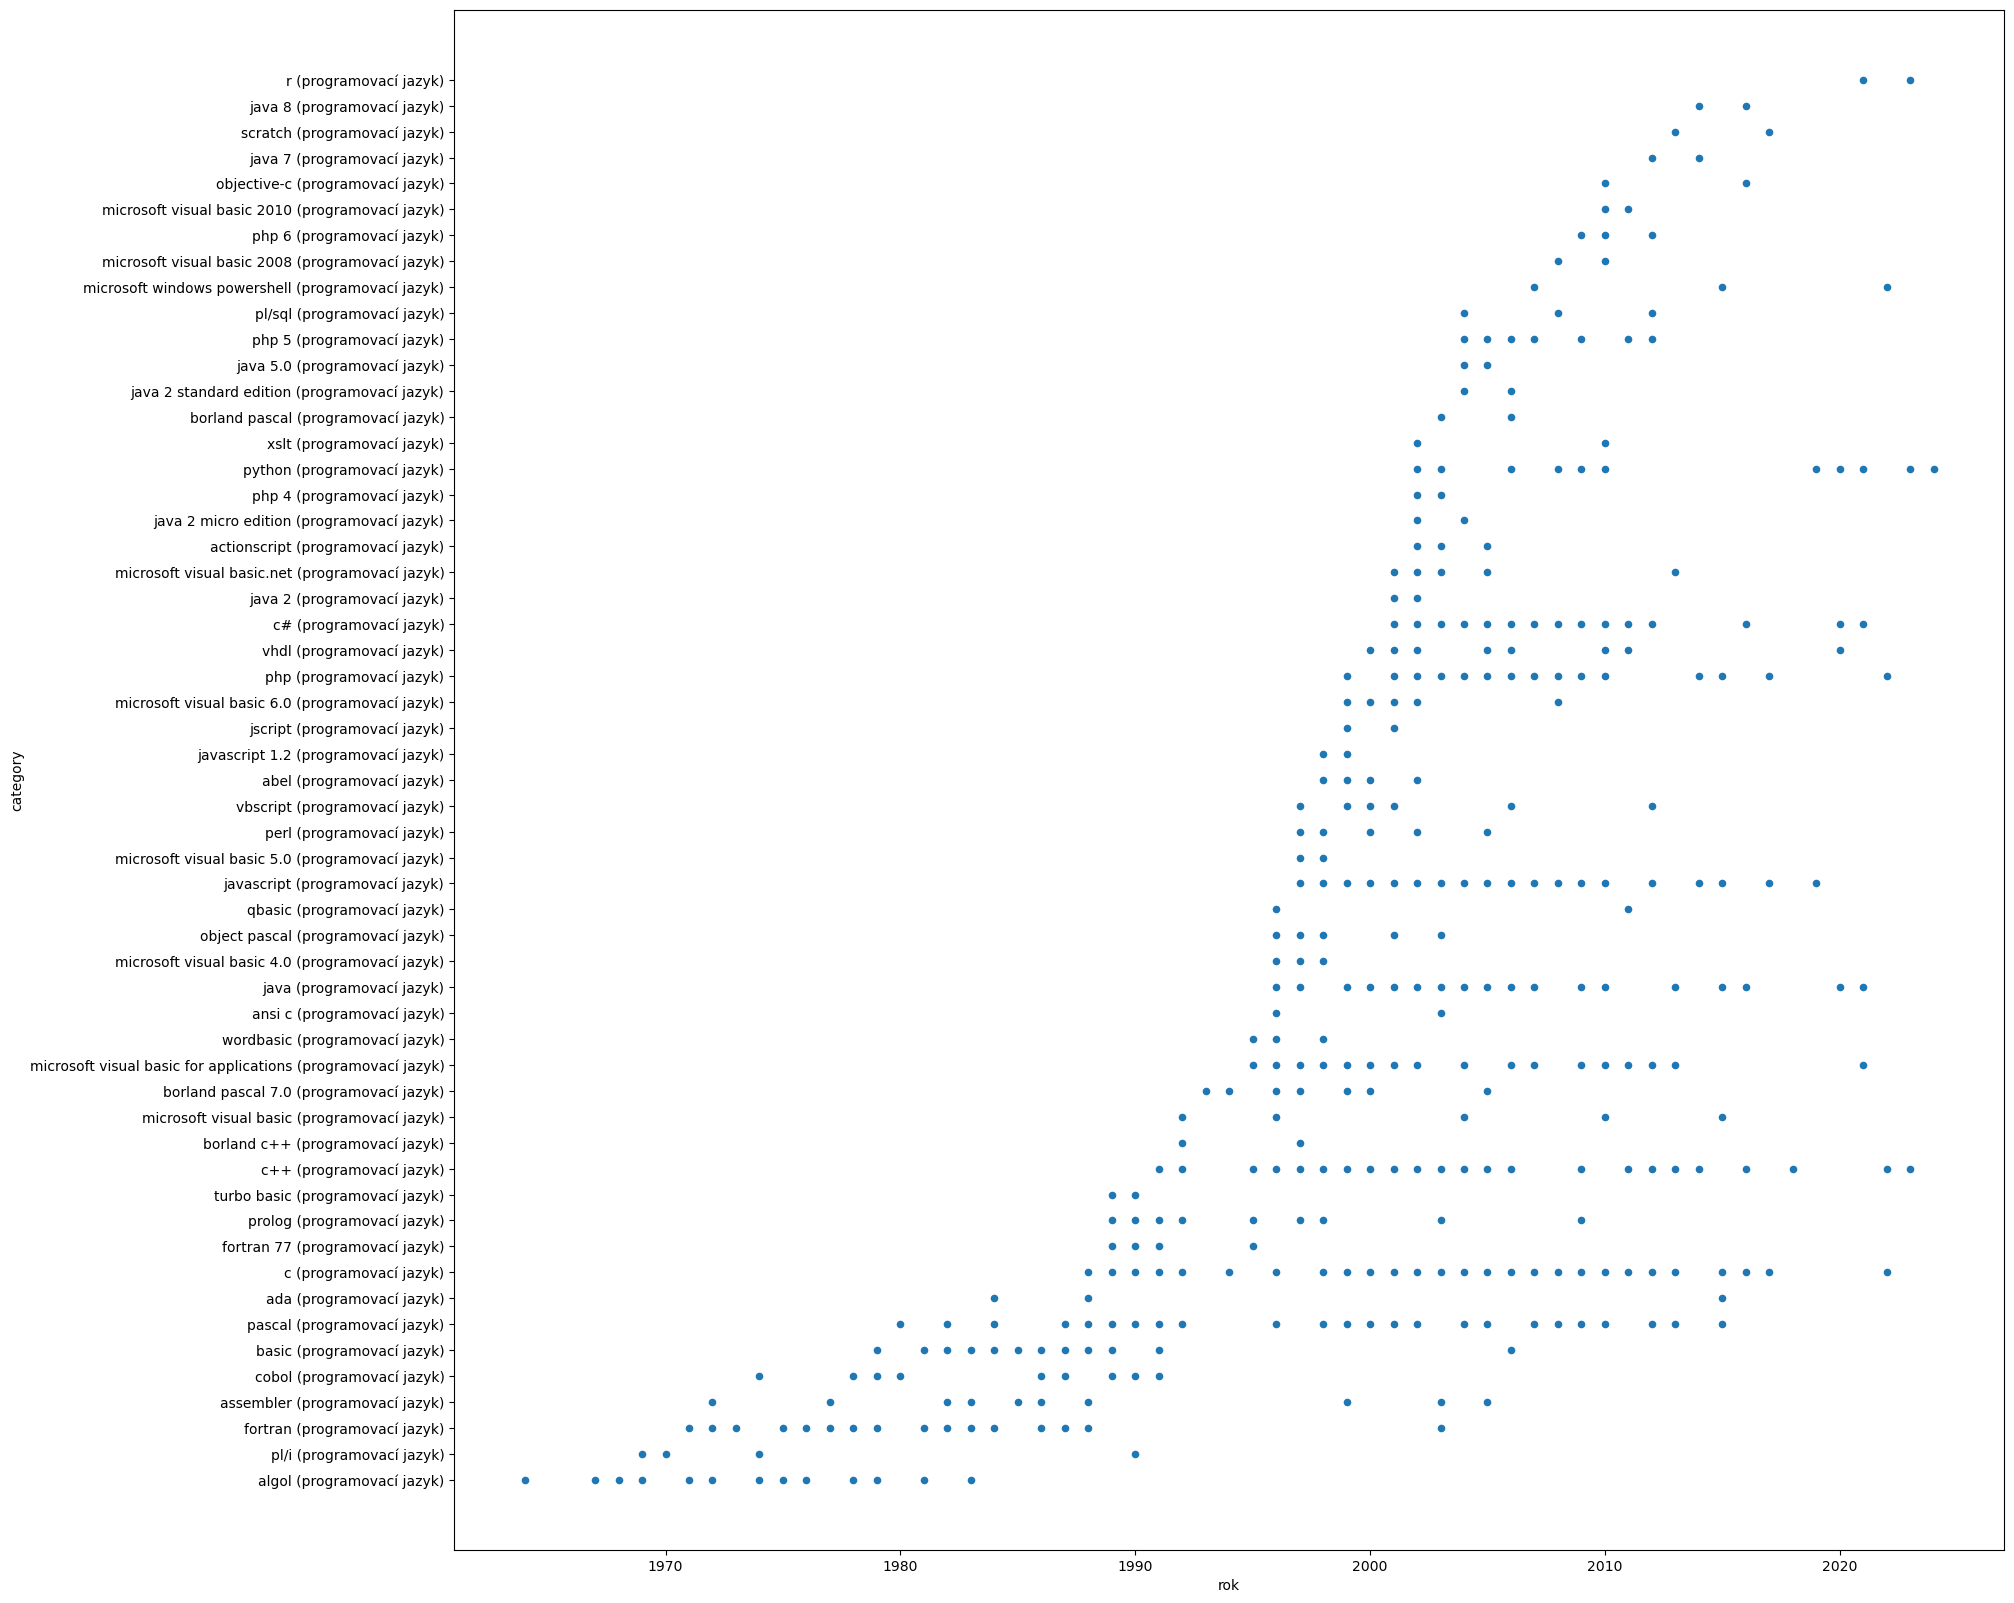

In [252]:
co = jazyky
slovnik = {}
for c in co:
    slovnik[c] = pd.Series(df[df['temata'] == c].groupby('rok').size())
df_melted = pd.DataFrame(slovnik).reset_index().melt(
    id_vars=['rok'],  # Keep the year column
    var_name='category',  # Name for the column that will contain current column names
    value_name='count'  # Name for the values column
).dropna()  # Optional: remove rows where count is NaN

# If you want the year as index again
df_melted = df_melted.set_index('rok')

# Sort by year and category if desired
df_melted = df_melted.sort_values(['rok', 'category'])
df_melted.reset_index(drop=False).plot.scatter(x='rok',y='category', figsize=(20,20))

<Axes: xlabel='rok', ylabel='category'>

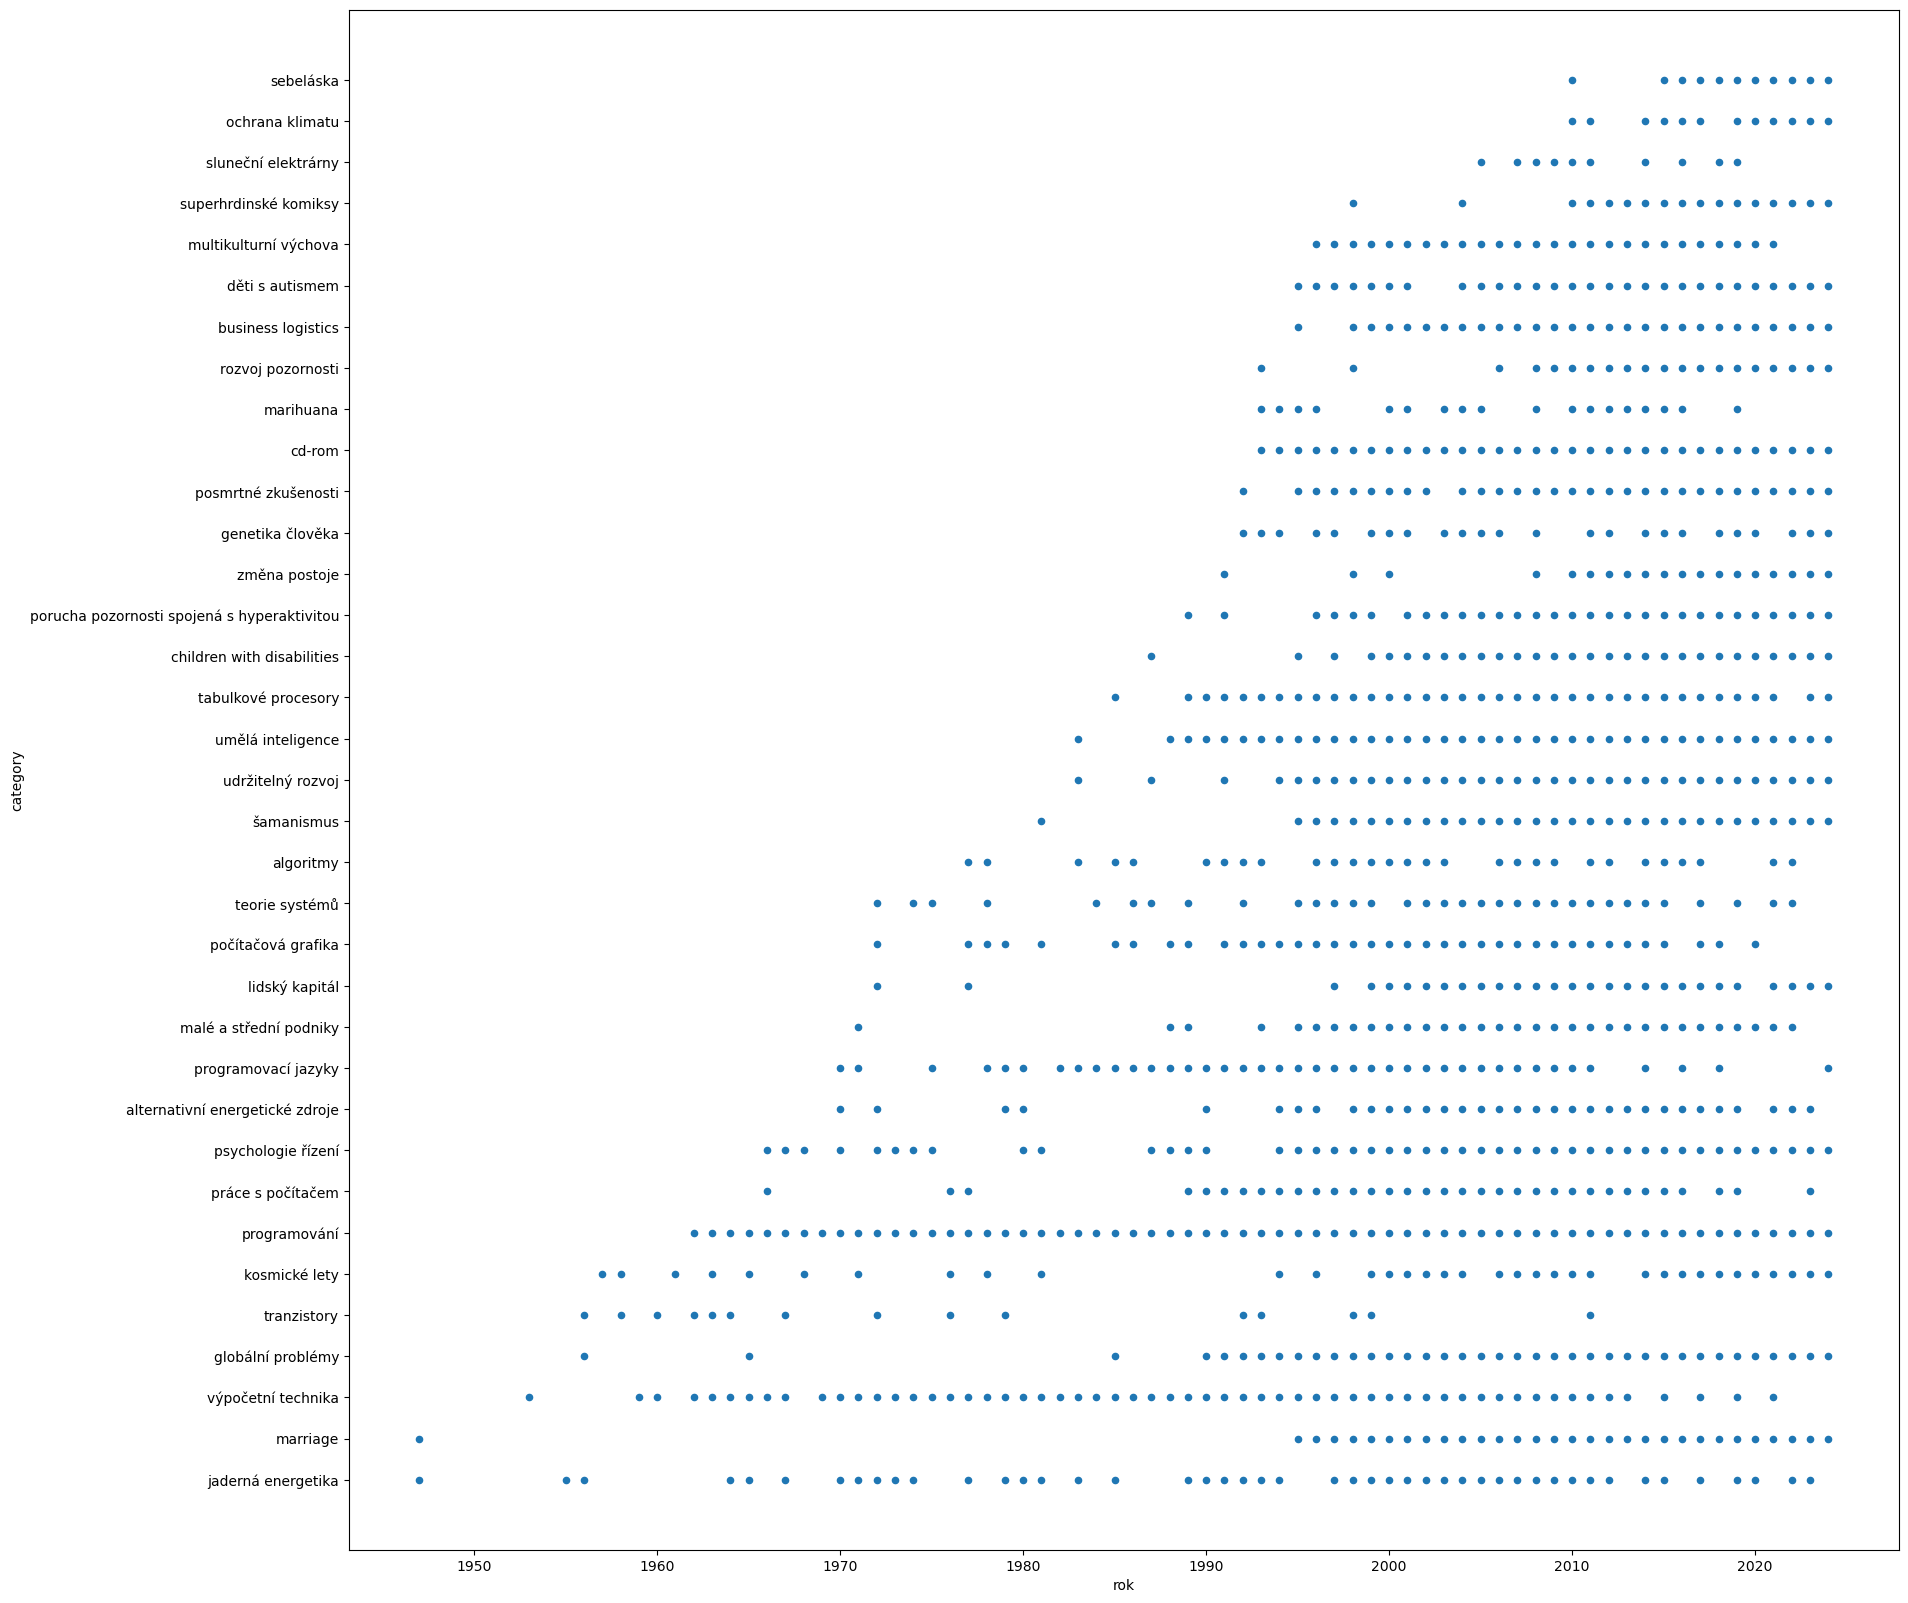

In [332]:
co = vyber_temat
slovnik = {}
for c in co:
    slovnik[c] = pd.Series(df[df['temata'] == c].groupby('rok').size())
df_melted = pd.DataFrame(slovnik).reset_index().melt(
    id_vars=['rok'],  # Keep the year column
    var_name='category',  # Name for the column that will contain current column names
    value_name='count'  # Name for the values column
).dropna()  # Optional: remove rows where count is NaN

# If you want the year as index again
df_melted = df_melted.set_index('rok')

# Sort by year and category if desired
df_melted = df_melted.sort_values(['rok', 'category'])
df_melted.reset_index(drop=False).plot.scatter(x='rok',y='category', figsize=(20,20))

In [336]:
str(df_melted.reset_index(drop=False))

'         rok             category  count\n0     1947.0   jaderná energetika    1.0\n1     1947.0             marriage    1.0\n2     1953.0   výpočetní technika    1.0\n3     1955.0   jaderná energetika    1.0\n4     1956.0    globální problémy    1.0\n...      ...                  ...    ...\n1065  2024.0  tabulkové procesory    1.0\n1066  2024.0    udržitelný rozvoj    3.0\n1067  2024.0    umělá inteligence   11.0\n1068  2024.0        změna postoje   18.0\n1069  2024.0           šamanismus    3.0\n\n[1070 rows x 3 columns]'

In [344]:
def analyze_category_correlations(df, min_years=5, correlation_threshold=0.7, top_n=10):
    """
    Analyze and print correlations between book categories based on their count development over years.
    
    Parameters:
    df (pandas.DataFrame): DataFrame with columns 'rok' (year), 'category', and 'count'
    min_years (int): Minimum number of years a category must appear to be included
    correlation_threshold (float): Minimum correlation coefficient to consider categories as correlated
    top_n (int): Number of top correlations to print
    
    Returns:
    tuple: (pivot_df, correlation_matrix, correlated_pairs)
    """
    # Create a pivot table with years as index and categories as columns
    pivot_df = df.pivot_table(
        index='rok',
        columns='category',
        values='count',
        fill_value=0
    )
    
    # Filter categories that appear in at least min_years years
    category_counts = (pivot_df > 0).sum()
    valid_categories = category_counts[category_counts >= min_years].index
    pivot_df = pivot_df[valid_categories]
    
    # Calculate correlation matrix
    correlation_matrix = pivot_df.corr()
    
    # Find highly correlated pairs
    correlated_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            correlation = correlation_matrix.iloc[i, j]
            if abs(correlation) >= correlation_threshold:
                cat1 = correlation_matrix.columns[i]
                cat2 = correlation_matrix.columns[j]
                correlated_pairs.append({
                    'category1': cat1,
                    'category2': cat2,
                    'correlation': correlation
                })
    
    # Sort pairs by absolute correlation value
    correlated_pairs = sorted(
        correlated_pairs,
        key=lambda x: abs(x['correlation']),
        reverse=True
    )
    
    # Print results
    print(f"\nTop {top_n} correlated category pairs:")
    print("-" * 80)
    for i, pair in enumerate(correlated_pairs[:top_n], 1):
        print(f"{i}. {pair['category1']} <-> {pair['category2']}")
        print(f"   Correlation: {pair['correlation']:.3f}")
        print()
    
    return pivot_df, correlation_matrix, correlated_pairs

In [358]:
results = analyze_category_correlations(
    df_melted,
    min_years=3,  # Show categories that appear in at least 3 years
    correlation_threshold=0.,  # Show correlations of 0.6 or higher
    top_n=15  # Show top 15 correlations
)



Top 15 correlated category pairs:
--------------------------------------------------------------------------------
1. sebeláska <-> superhrdinské komiksy
   Correlation: 0.943

2. alternativní energetické zdroje <-> multikulturní výchova
   Correlation: 0.894

3. business logistics <-> multikulturní výchova
   Correlation: 0.888

4. marriage <-> psychologie řízení
   Correlation: 0.883

5. business logistics <-> psychologie řízení
   Correlation: 0.882

6. business logistics <-> marriage
   Correlation: 0.866

7. cd-rom <-> children with disabilities
   Correlation: 0.848

8. alternativní energetické zdroje <-> business logistics
   Correlation: 0.835

9. business logistics <-> lidský kapitál
   Correlation: 0.833

10. lidský kapitál <-> multikulturní výchova
   Correlation: 0.831

11. programování <-> práce s počítačem
   Correlation: 0.830

12. business logistics <-> udržitelný rozvoj
   Correlation: 0.828

13. sebeláska <-> změna postoje
   Correlation: 0.822

14. marriage <-> prác